### 1) Operation on image: Rotation, translation, scaling, shearing, affine transformation, Land Marks
### 2) Hough Transform for straight lines without edge orientation
### 3) Edge Detection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#cv2 is used only for reading images.
import cv2
import math
import matplotlib.image as mpimg


In [2]:
#This function is the image transformation with NN algorithm
def ImageTransformation(ImageInput,TranslateMask):
    TargetImage = np.zeros([len(ImageInput), len(ImageInput[0])])
    TranslateMaskInv = np.linalg.inv(TranslateMask)
    for row in range(0,TargetImage.shape[0]):
        for col in range(TargetImage.shape[1]):
            ImageVal=np.float32([[row],[col],[1]])
            SrcImage=np.matmul(TranslateMaskInv,ImageVal)
            TargetTemp= np.round(SrcImage).astype(int)
#             print(TargetTemp)
            Tx= TargetTemp[0,0]
            Ty= TargetTemp[1,0]
#             if((Tx in range(ImageInput.shape[0])) and (Ty in range(ImageInput.shape[1]))):
            if((Tx > 0 and Tx < ImageInput.shape[0]) and (Ty >0 and Ty<ImageInput.shape[1])):      
                   TargetImage[row,col] = ImageInput[Tx,Ty]
            
            TargetImageInt= TargetImage.astype(int)
    return TargetImageInt



#-----------------------------------------------------------------------------------------------------------------
#This function is the image transformation with Bilinear Interpolation
def BilinearTransformation(ImageInput,TranslateMask):
    TargetImage = np.zeros([len(ImageInput), len(ImageInput[0])])
    TranslateMaskInv = np.linalg.inv(TranslateMask)
    for row in range(0,TargetImage.shape[0]):
        for col in range(TargetImage.shape[1]):
            ImageVal=np.float32([[row],[col],[1]])
            SrcImage=np.matmul(TranslateMaskInv,ImageVal)
#             TargetTemp= np.round(SrcImage).astype(int)
#             print(TargetTemp)
            Tx= SrcImage[0,0]
            Ty= SrcImage[1,0]
            
            x0 = np.floor(Tx).astype(int)
            x1 = np.ceil(x0).astype(int)
            y0 = np.floor(Ty).astype(int)
            y1 = np.ceil(y0).astype(int)
            
            
            if(Tx > 0 and Tx <= ImageInput.shape[0]-1 and Ty > 0 and Ty <= ImageInput.shape[1]-1):
                IntensityAtA = ImageInput[ x0, y0 ]
                IntensityAtB = ImageInput[ x0, y1 ]
                IntensityAtC = ImageInput[ x1, y0 ]
                IntensityAtD = ImageInput[ x1, y1 ]
                TargetImage[row,col] =np.matmul(np.matmul(np.float32([[1-Tx, Tx]]),np.float32([[IntensityAtA, IntensityAtB],[IntensityAtC, IntensityAtD]])),np.float32([[1-Ty],[Ty]]))
#                 TargetImage[row,col]=np.matmul(np.matmul(A, B),C)
                TargetImageInt= TargetImage.astype(int)
    return TargetImageInt

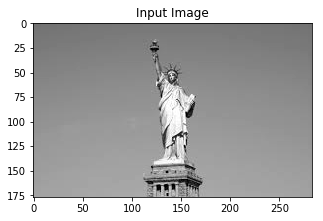

In [3]:
inputImage = cv2.imread("SOL.jpg",0)
f = plt.figure(figsize=(5,5))
plt.title("Input Image")
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
plt.show()



In [38]:
#All Masks
TranslateImageMask = np.float32([[1, 0, 20],[0, 1, 20],[0, 0, 1]])
ScaleImageMask = np.float32([[1.2, 0, 0],[0, 1.2, 0],[0, 0, 1]])

ShearYImageMask = np.float32([[1,0,0],[0.2,1,0],[0,0,1]])
ShearXImageMask = np.float32([[1,0.2,0],[0,1,0],[0,0,1]])

RotationImageMask = np.float32([[math.cos(math.radians(20)), math.sin(math.radians(20)),0],[-1*math.sin(math.radians(20)),math.cos(math.radians(20)) , 0],[0, 0, 1]])

AffineTransformationMask = np.matmul(np.matmul(np.matmul(np.matmul(ShearYImageMask,ShearXImageMask),ScaleImageMask),TranslateImageMask),RotationImageMask)


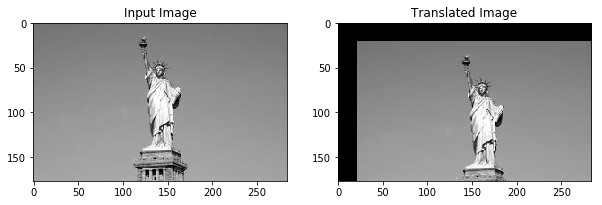

In [5]:
###############################TRANSLATION##################################
TranslatImageOp=ImageTransformation(inputImage,TranslateImageMask)
#Plot Both Images
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Translated Image')
plt.imshow(TranslatImageOp,cmap = plt.get_cmap('gray'))
plt.show()


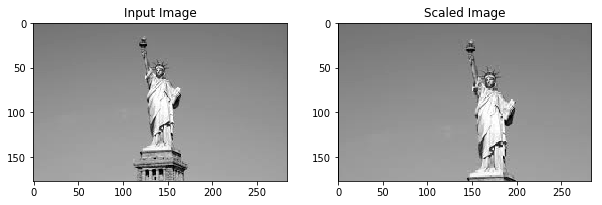

In [6]:
###############################SCALEING##################################
ScaleImageOp=ImageTransformation(inputImage,ScaleImageMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Scaled Image')
plt.imshow(ScaleImageOp,cmap = plt.get_cmap('gray'))
plt.show()

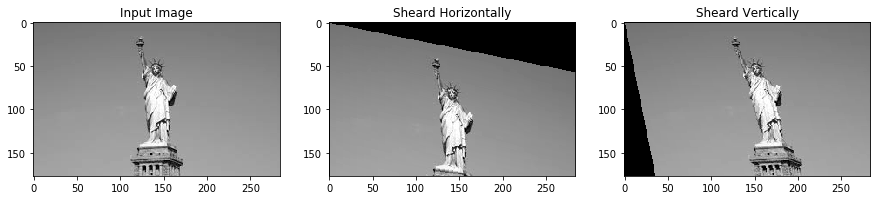

In [7]:
#############################SHEARING##############################
ShearXImageOp=ImageTransformation(inputImage,ShearXImageMask)
ShearYImageOp=ImageTransformation(inputImage,ShearYImageMask)

f = plt.figure(figsize=(15,15))
f.add_subplot(1,3, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 2)
plt.title('Sheard Horizontally')
plt.imshow(ShearXImageOp,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 3)
plt.title('Sheard Vertically')
plt.imshow(ShearYImageOp,cmap = plt.get_cmap('gray'))
plt.show()

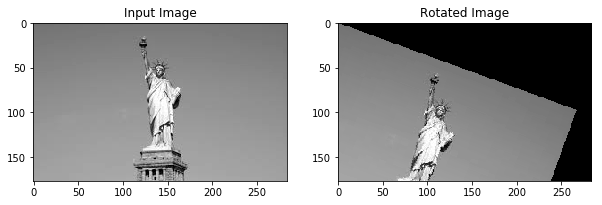

In [8]:
###############################ROTATION################################
RotationImageOp=ImageTransformation(inputImage,RotationImageMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Rotated Image')
plt.imshow(RotationImageOp,cmap = plt.get_cmap('gray'))
plt.show()

## Bilinear Transformation

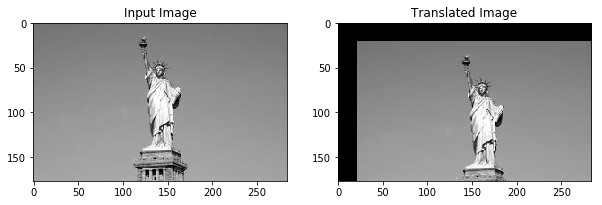

True


In [9]:


TranslatImageBilinear=BilinearTransformation(inputImage,TranslateImageMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Translated Image')
plt.imshow(TranslatImageBilinear,cmap = plt.get_cmap('gray'))
plt.show()




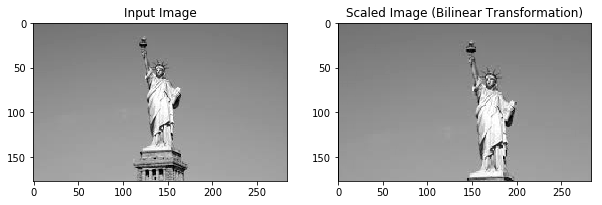

In [10]:
ScaleImageBilinear=BilinearTransformation(inputImage,ScaleImageMask)

f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Scaled Image (Bilinear Transformation)')
plt.imshow(ScaleImageBilinear,cmap = plt.get_cmap('gray'))
plt.show()

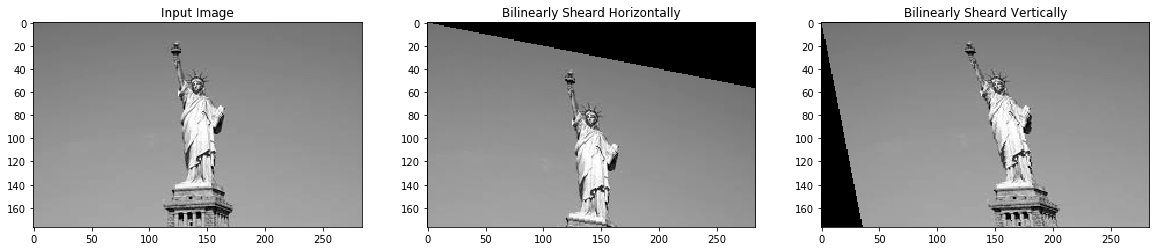

In [11]:
ShearXImageBilinear=BilinearTransformation(inputImage,ShearXImageMask)
ShearYImageBilinear=BilinearTransformation(inputImage,ShearYImageMask)

f = plt.figure(figsize=(20,20))
f.add_subplot(1,3, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 2)
plt.title('Bilinearly Sheard Horizontally')
plt.imshow(ShearXImageBilinear,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 3)
plt.title('Bilinearly Sheard Vertically')
plt.imshow(ShearYImageBilinear,cmap = plt.get_cmap('gray'))
plt.show()

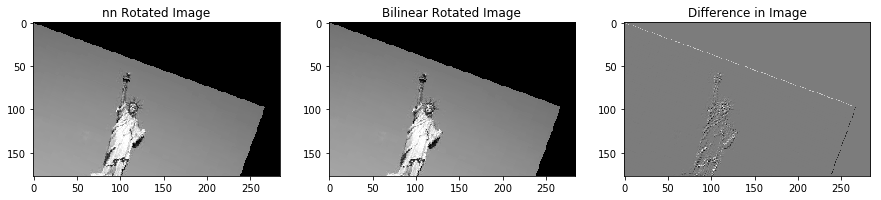

In [12]:

RotationImageBilinear=BilinearTransformation(inputImage,RotationImageMask)
#Difference Between KNN and Bilinear Transformation
DifferenceImage= np.subtract(RotationImageBilinear,RotationImageOp)

f = plt.figure(figsize=(15,15))
f.add_subplot(1,3, 1)
plt.title('nn Rotated Image')
plt.imshow(RotationImageOp,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 2)
plt.title('Bilinear Rotated Image')
plt.imshow(RotationImageBilinear,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 3)
plt.title('Difference in Image')
plt.imshow(DifferenceImage,cmap = plt.get_cmap('gray'))
plt.show()


# print(np.max(RotationImageBilinear))

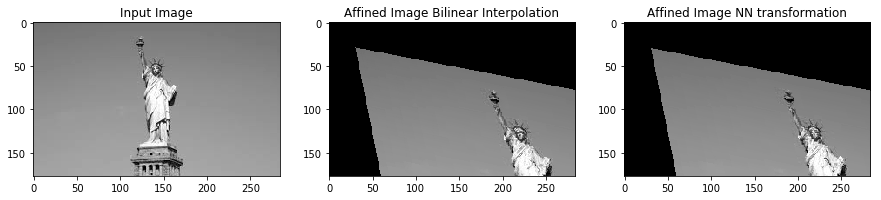

In [13]:
#Affine Transformation (6 parameter)
#In this we use Scale Value (Sx, Sy), Translation (Tx, Ty) and Rotation
AffineImageBilinear=BilinearTransformation(inputImage,AffineTransformationMask)
AffineImageOp=ImageTransformation(inputImage,AffineTransformationMask)

f = plt.figure(figsize=(15,15))
f.add_subplot(1,3, 1)
plt.title('Input Image')
plt.imshow(inputImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 2)
plt.title('Affined Image Bilinear Interpolation')
plt.imshow(AffineImageBilinear,cmap = plt.get_cmap('gray'))
f.add_subplot(1,3, 3)
plt.title('Affined Image NN transformation')
plt.imshow(AffineImageOp,cmap = plt.get_cmap('gray'))

plt.show()

## 1.2 LandMark


In [40]:
points_x=[]
points_y=[]
ix,iy = -1,-1
# mouse callback function
def LandMarkBox(event,x,y,flags,param):
    global ix,iy
    if event == cv2.EVENT_LBUTTONDBLCLK:
        # cv2.circle(img,(x,y),100,(255,0,0),-1)
        points_x.append(x)
        points_y.append(y)
        ix,iy = x,y
#-----------------------------------------------------------------------
# Create a black image, a window and bind the function to window
img1 = cv2.imread("imageA.png", 0)
cv2.namedWindow('image')
cv2.setMouseCallback('image', LandMarkBox)

while(1):
    cv2.imshow('image',img1)
    k = cv2.waitKey(20) & 0xFF
    # print(ix,iy)
    if k == 27 or len(points_x)>2:
        break
        
cv2.destroyAllWindows()

# print(points_x)
# print(points_y)

In [41]:
SixCrossSix = [ [points_x[0],points_y[0],1,0,0,0],[0,0,0,points_x[0],points_y[0],1],[points_x[1],points_y[1],1,0,0,0],[0,0,0,points_x[1],points_y[1],1],[points_x[2],points_y[2],1,0,0,0],[0,0,0,points_x[2],points_y[2],1] ]
SixCrossSix

[[113, 45, 1, 0, 0, 0],
 [0, 0, 0, 113, 45, 1],
 [86, 160, 1, 0, 0, 0],
 [0, 0, 0, 86, 160, 1],
 [173, 158, 1, 0, 0, 0],
 [0, 0, 0, 173, 158, 1]]

In [42]:
#-----------------------------------------------------------------------
points_x=[]
points_y=[]
img2 = cv2.imread("imageA.png", 0)
TranslationImageLandmark = ImageTransformation(img2,TranslateImageMask)
cv2.imwrite("RotatedImageLandmark.png",TranslationImageLandmark)
img3 = cv2.imread("RotatedImageLandmark.png", 0)

cv2.namedWindow('image')
cv2.setMouseCallback('image',LandMarkBox)

while(1):
    cv2.imshow('image',img3)
    k = cv2.waitKey(20) & 0xFF
    # print(ix,iy)
    if k == 27 or len(points_x)>2:
        break
        
cv2.destroyAllWindows()

# print(points_x)
# print(points_y)

In [43]:
TSixCross1 = [ points_x[0],points_y[0],points_x[1],points_y[1],points_x[2],points_y[2]]
TSixCross1
invMat = np.linalg.inv(SixCrossSix)
MulLandmark= np.matmul(invMat,TSixCross1)

MulLandmark

array([  1.02271129e+00,  -1.20590895e-02,   1.79762838e+01,
         2.31132549e-02,   1.00542659e+00,   1.71440056e+01])

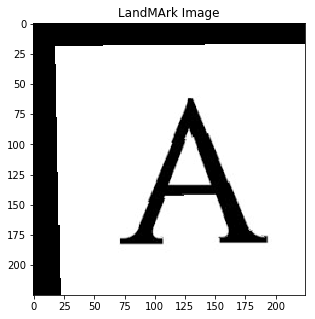

In [44]:
MatLandmark = np.reshape(MulLandmark, [2,3])

landmarkMask = np.append(MatLandmark,[[0,0,1]], axis=0)

imgRead = cv2.imread("imageA.png", 0)
LandmarkImage = ImageTransformation(imgRead,landmarkMask)

f = plt.figure(figsize=(5,5))
plt.title("LandMArk Image")
plt.imshow(LandmarkImage,cmap = plt.get_cmap('gray'))
plt.show()


## Problem 2: Hough Transform for straight lines without edge orientation

## Functions


In [47]:
def rgb2gray(image_rgb):

    r, g, b = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]
    image_gray = np.round(0.2989 * r + 0.5870 * g + 0.1140 * b).astype(np.uint8)
    return image_gray

def getLength(start,end):

    x1=end[0]-start[0]
    y1=end[1]-start[1]
    diagonalLen=np.sqrt(x1*x1+y1*y1)
    return diagonalLen


def getRohThetaValues(inputImage,votesThresh,filterValues,thresholdPixels=0):
    
    rows, cols = inputImage.shape
    theta = np.linspace(-90.0, 0.0, 91)
    theta = np.concatenate((theta, -theta[len(theta)-2::-1]))
    
    
    diagonal = np.sqrt((rows - 1)**2 + (cols - 1)**2)
    sizeDiagonal = np.ceil(diagonal)
    countRoh = 2*sizeDiagonal + 1
    rho = np.linspace(-sizeDiagonal, sizeDiagonal, countRoh)
    AccumulatorMatrix = np.zeros((len(rho), len(theta)))
    
    
    for rowIdx in range(rows):                               
        for coldIdx in range(cols):                        
            if inputImage[rowIdx, coldIdx]>thresholdPixels:           
                for thetaIds in range(len(theta)):
                    ValuesRoh = coldIdx*np.cos(math.radians(theta[thetaIds])) + rowIdx*np.sin(math.radians(theta[thetaIds]))
                    indexsRoh = np.nonzero(np.abs(rho-ValuesRoh) == np.min(np.abs(rho-ValuesRoh)))[0]
                    AccumulatorMatrix[indexsRoh[0], thetaIds] += 1  
            
   
   #cluster and filter multiple dots in Houghs plane
    if filterValues>0:
        SizeClust=filterValues
        values=np.transpose(np.array(np.nonzero(AccumulatorMatrix>votesThresh)))
        filTemp=[]
        filTemp.append(0)
        Farray=[]
        for i in range (0, len(values)):
            if i in filTemp[1::]:
                continue
            ArrayTemp=[i]
            for j in range (i+1, len(values)):
                if j in filTemp[1::]:
                    continue
                for k in range (0, len(ArrayTemp)):
                    if getLength(values[ArrayTemp[k]],values[j])<SizeClust:
                        filTemp.append(j)
                        ArrayTemp.append(j)
                        break
            Farray.append(ArrayTemp)
        
        #leave the highest value in each cluster
        for i in range (0, len(Farray)):
            for j in range (0, len(Farray[i])):
                if j==0:
                    highest=AccumulatorMatrix[values[Farray[i][j]][0],values[Farray[i][j]][1]]
                    tempI=i
                    tempJ=j
                else:
                    if AccumulatorMatrix[values[Farray[i][j]][0],values[Farray[i][j]][1]]>=highest:
                        highest=AccumulatorMatrix[values[Farray[i][j]][0],values[Farray[i][j]][1]]
                        AccumulatorMatrix[values[Farray[tempI][tempJ]][0],values[Farray[tempI][tempJ]][1]]=0
                        tempI=i
                        tempJ=j
                    else:
                        AccumulatorMatrix[values[Farray[i][j]][0],values[Farray[i][j]][1]]=0
           

    FinalrohValues = (np.where(AccumulatorMatrix>votesThresh)[0]-sizeDiagonal)         
    FinalThetaValues=theta[np.where(AccumulatorMatrix>votesThresh)[1]]*np.pi/180.0
    return FinalrohValues, FinalThetaValues, AccumulatorMatrix



def houghLinePlotting(rho,theta,inputImage):
  
    thetaTempCos = np.cos(theta)
    thetaTempSin = np.sin(theta)
    x0 = thetaTempCos*rho
    y0 = thetaTempSin*rho

    fig2, pltaxis = plt.subplots(ncols=1, nrows=1)
    pltaxis.imshow(inputImage)
    
    for i in range (0, len(rho)):   
        pltaxis.plot( [x0[i] + 1000*(-thetaTempSin[i]), x0[i] - 1000*(-thetaTempSin[i])],
                  [y0[i] + 1000*(thetaTempCos[i]), y0[i] - 1000*(thetaTempCos[i])], 
                  'xb-',linewidth=2)
    
    pltaxis.set_ylim([inputImage.shape[0],0])
    pltaxis.set_xlim([0,inputImage.shape[1]])
    
    plt.show()
    
    


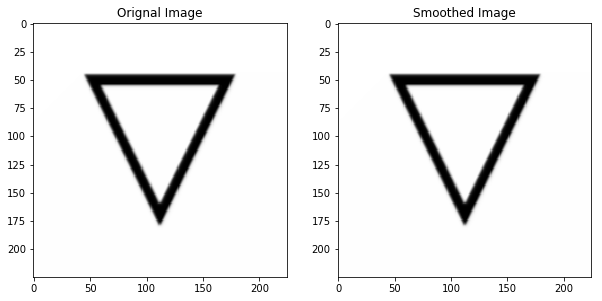

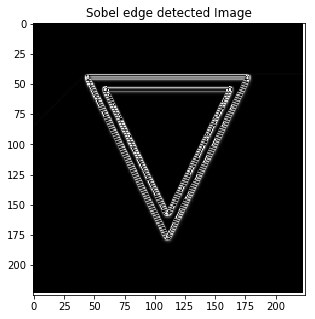

In [50]:
## Smooth and edge detection image (snobel)

def image_smoothing(image,kernelSize) :
    for row in range(image.shape[0] - 1):
         for col in range(image.shape[1] - 1):
                  image[row+1,col+1] = np.mean(image[row:row+kernelSize,col:col+kernelSize])

    return(image)
#-------------------------------------------------------------------------------------------------------------

def EdgeDetection(image):
    ImageGxGy = np.zeros(shape=(image.shape[0],image.shape[1]))
    ImageGx = np.zeros(shape=(image.shape[0],image.shape[1]))
    ImageGy = np.zeros(shape=(image.shape[0],image.shape[1]))
    Tan = np.zeros(shape=(image.shape[0],image.shape[1]))

    #Sobel Edge Detection Algorithm:

    for rowSize in range(len(image)-2):
        for colSize in range(len(image[0])-2):
                #Sobel mask for x-direction:
                #multiplying only with the non zero values, as the matrices are already initialised with zeros

                Gy= ( (2*image [ rowSize+2,colSize+1 ]+image [ rowSize+2,colSize ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize,colSize+1 ]+image [rowSize,colSize ]+image [rowSize,colSize+2 ] ) );
                #Sobel mask for y-direimagetion:
                Gx= ( (2*image [ rowSize+1,colSize+2 ]+image [ rowSize,colSize+2 ]+image [ rowSize+2,colSize+2 ] )- (2*image [rowSize+1,colSize ]+image [rowSize,colSize ]+image [rowSize+2,colSize ] ) );

                ImageGx[rowSize][colSize] = Gx
                ImageGy[rowSize][colSize] = Gy
                image[rowSize,colSize]= math.pow((Gx**2+Gy**2),0.5)
                #handling Tan values for 0 and negative and mapping into grey scale image
                Tan[rowSize][colSize] = ((math.degrees(math.atan(Gy/Gx)) + 90) *255/180) if Gx != 0 else 255
            
    return image

#----------------------------------------------------------
triangleImage = cv2.imread("triangel.png",0)

#Output Image after Smoothing
imageSmooth = image_smoothing(triangleImage,3)

#Plot Both Images
f = plt.figure(figsize=(10,10))
f.add_subplot(1,2, 1)
plt.title('Orignal Image')
plt.imshow(triangleImage,cmap = plt.get_cmap('gray'))
f.add_subplot(1,2, 2)
plt.title('Smoothed Image')
plt.imshow(imageSmooth,cmap = plt.get_cmap('gray'))
plt.show()
        
edgeImageForHough = EdgeDetection(imageSmooth)  

#ploting all 6 images

f = plt.figure(figsize=(5,5))
plt.title("Sobel edge detected Image")
plt.imshow(edgeImageForHough,cmap = 'gray')
plt.show()



In [51]:
thicknessBorder = 3                         
sizeOfX, sizeOfY = edgeImageForHough.shape

edgeImageForHough[0:thicknessBorder,0:sizeOfY] = 0
edgeImageForHough[sizeOfX-thicknessBorder:sizeOfX,0:sizeOfY] = 0
edgeImageForHough[0:sizeOfX,0:thicknessBorder] = 0
edgeImageForHough[0:sizeOfX,sizeOfY-thicknessBorder:sizeOfY] = 0


##Save edgeImageForHough picture to jpg
# fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
# ax1.set_axis_off()
# ax1.imshow(edgeImageForHough, cmap="gray")

rho,theta,AccumulatorMatrix = getRohThetaValues(edgeImageForHough, votesThresh=130, filterValues=5, thresholdPixels=0)





C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


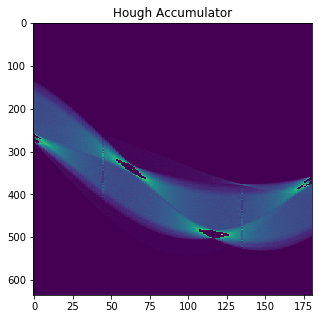

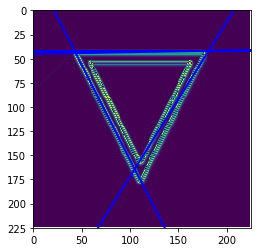

In [52]:
f = plt.figure(figsize=(5,5))
plt.title("Hough Accumulator")
plt.imshow(AccumulatorMatrix, aspect= 'auto')
plt.show()

houghLinePlotting(rho, theta, triangleImage)